In [198]:
import numpy 
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import numpy as np
import os
import pickle

from scipy import interpolate

In [199]:
e_file = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites/era_interim.nc'
m_file = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites/modis_merra.nc'

In [200]:
e_ds = xr.open_dataset(e_file)
m_ds = xr.open_dataset(m_file)

In [203]:
print(e_ds)

<xarray.Dataset>
Dimensions:            (x: 30, x_edges: 31, y: 30, y_edges: 31)
Coordinates:
    X                  (x) float64 -1.45e+03 -1.35e+03 ... 1.35e+03 1.45e+03
    Y                  (y) float64 -1.45e+03 -1.35e+03 ... 1.35e+03 1.45e+03
    X_edges            (x_edges) float64 ...
    Y_edges            (y_edges) float64 ...
Dimensions without coordinates: x, x_edges, y, y_edges
Data variables:
    pr_nh_ocean_warm   (x, y) float64 ...
    prw_nh_ocean_warm  (x, y) float64 ...
    ws_nh_ocean_warm   (x, y) float64 ...
    pr_sh_ocean_warm   (x, y) float64 ...
    prw_sh_ocean_warm  (x, y) float64 ...
    ws_sh_ocean_warm   (x, y) float64 ...


In [204]:
print(m_ds)

<xarray.Dataset>
Dimensions:      (x: 25, y: 25)
Coordinates:
    X            (x, y) float32 -0.0 -0.0 -0.0 ... -2078.4612 -2318.2222 -2400.0
    Y            (x, y) float32 0.0 -0.0 -0.0 ... 621.1654 -0.00020981467
    angle        (x) float32 ...
    dist         (x) float32 ...
Dimensions without coordinates: x, y
Data variables:
    modis_cld    (x, y) float32 92.146996 91.909424 ... 67.6577 56.993305
    merra_pw     (x, y) float32 19.11767 18.964869 ... 21.494896 27.856266
    merra_omega  (x, y) float32 ...


In [2]:
e_x = e_ds.X.values
e_y = e_ds.Y.values
print(e_x.shape)
print(e_y.shape)

m_x = m_ds.X.values
m_y = m_ds.Y.values

e_x_grid, e_y_grid = np.meshgrid(e_x, e_y)

m_modis_cld = m_ds.modis_cld.values
m_merra_pw = m_ds.merra_pw.values
m_merra_omega = m_ds.merra_omega.values

NameError: name 'e_ds' is not defined

In [50]:
m_x_1d = m_x.flatten()
m_y_1d = m_y.flatten()

m_modis_cld_1d = m_modis_cld.flatten()
m_merra_pw_1d = m_merra_pw.flatten()
m_merra_omega_1d = m_merra_omega.flatten()

e_x_1d = e_x_grid.flatten()
e_y_1d = e_y_grid.flatten()

print(m_x.shape, m_modis_cld.shape)
print(m_y.shape)
print(e_x.shape, e_x_1d.shape)

(25, 25) (25, 25)
(25, 25)
(30,) (900,)


In [51]:
e_modis_cld = interpolate.griddata((m_x_1d, m_y_1d), m_modis_cld_1d, (e_x_1d, e_y_1d))
e_modis_cld = e_modis_cld.reshape(e_x_grid.shape)

e_merra_pw = interpolate.griddata((m_x_1d, m_y_1d), m_merra_pw_1d, (e_x_1d, e_y_1d))
e_merra_pw = e_merra_pw.reshape(e_x_grid.shape)

e_merra_omega = interpolate.griddata((m_x_1d, m_y_1d), m_merra_omega_1d, (e_x_1d, e_y_1d))
e_merra_omega = e_merra_omega.reshape(e_x_grid.shape)


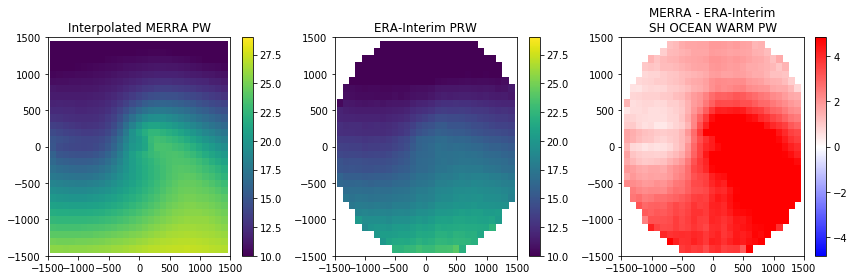

In [167]:
levels = np.arange(10, 30, 1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
# plt.pcolormesh(e_x, e_y, e_merra_pw)
plt.pcolormesh(e_x, e_y, e_merra_pw, vmin=levels[0], vmax=levels[-1])
plt.colorbar()
plt.ylim(-1500, 1500); plt.xlim(-1500, 1500)
plt.title('Interpolated MERRA PW')

plt.subplot(1,3,2)
plt.pcolormesh(e_x, e_y, e_ds.prw_sh_ocean_warm.values, vmin=levels[0], vmax=levels[-1])
plt.colorbar()
plt.ylim(-1500, 1500); plt.xlim(-1500, 1500)
plt.title('ERA-Interim PRW')
plt.tight_layout()

plt.subplot(1,3,3)
diff_val = e_merra_pw - e_ds.prw_sh_ocean_warm.values
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 80)
vmin = -1*vmax
plt.pcolormesh(e_x, e_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.ylim(-1500, 1500); plt.xlim(-1500, 1500)
plt.title('MERRA - ERA-Interim\nSH OCEAN WARM PW')
plt.tight_layout()

# plt.savefig('diff_test.png', dpi=300.)

In [171]:
# reading in the composites file
model_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_QBOi.EXP1.AMIP.v3.001_2008_2012/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl'

model_data = pickle.load(open(model_file, 'rb'))

In [174]:
print(model_data.keys())

dict_keys(['NH', 'SH', 'x', 'y', 'x_edges', 'y_edges'])


In [184]:
model_val = model_data['SH']['ocean']['warm']['tp']['area_sum']/model_data['SH']['ocean']['warm']['tp']['area_cnt']

/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


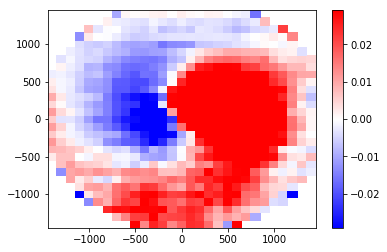

In [197]:
diff_val = model_val - e_ds.pr_sh_ocean_warm.values
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 80)
vmin = -1*vmax
plt.pcolormesh(e_x, e_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()